## Conclusion

KD-Trees work terribly when splits are done directly on high-dimensional data

In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import scipy as sp
import scipy.io
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from kdtree import KDTree

In [149]:
INT2LABEL = 'ABCDEFGHIJ'

In [150]:
data = sp.io.loadmat("notMNIST_small.mat")
images = data['images']
labels = data['labels'].astype(int)
labels = np.array(list(INT2LABEL))[labels]
samples = (2 * images.reshape(784, -1).T - 255.0) / 255.0
trnX, devX, trnY, devY = train_test_split(samples, labels, test_size=0.1)

In [151]:
tree = KDTree(trnX, trnY)

In [152]:
def viz_pt(x):
    plt.imshow(x.reshape(28, 28))
    plt.show()

In [167]:
idx = np.random.randint(devY.size)
x, y = devX[idx], devY[idx]

Actual point, with label G


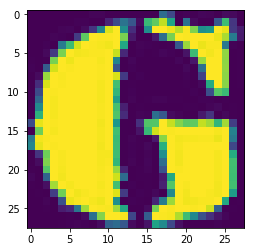

E 0.101


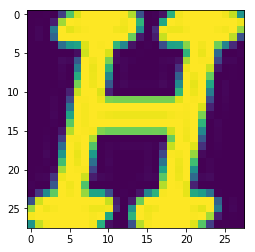

E 0.101


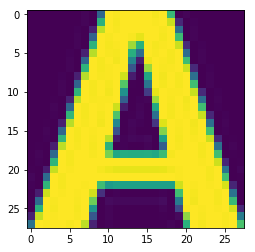

E 0.101


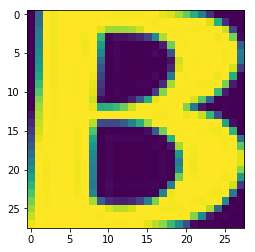

J 0.115


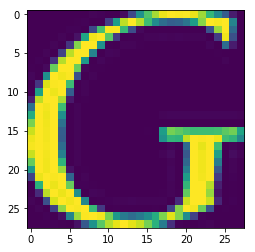

J 0.115


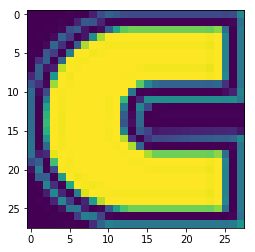

J 0.115


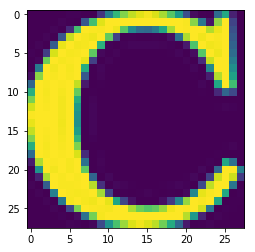

A 0.196


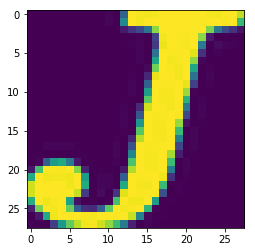

A 0.196


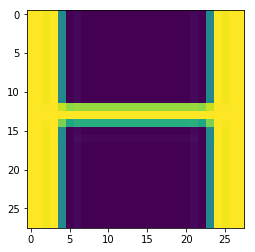

A 0.196


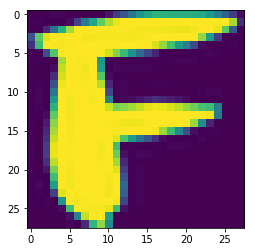

A 0.196


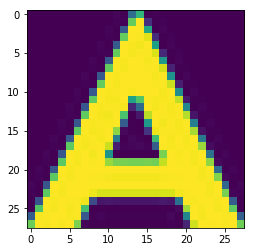

A 0.196


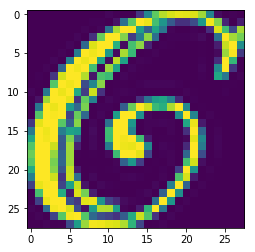

J 0.256


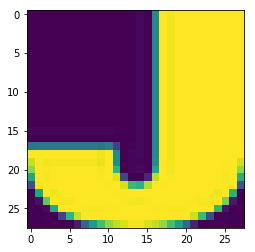

J 0.257


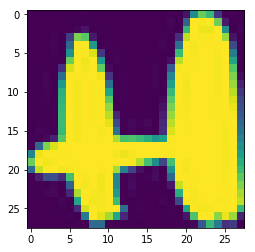

J 0.256


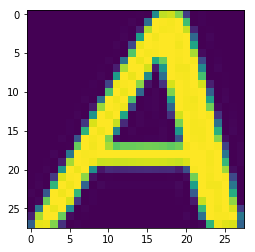

J 0.256


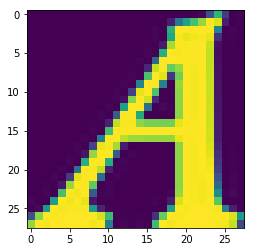

J 0.256


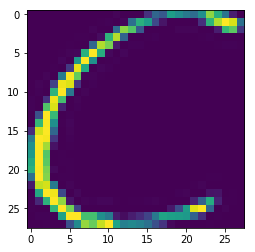

J 0.303


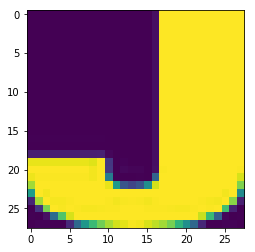

J 0.308


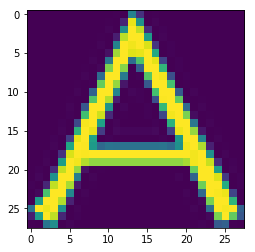

J 0.308


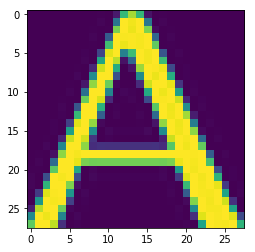

J 0.308


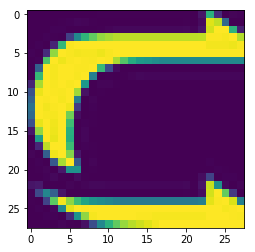

A 0.317


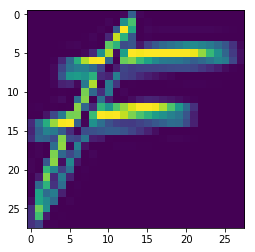

A 0.317


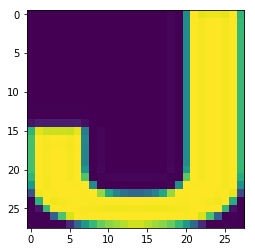

A 0.323


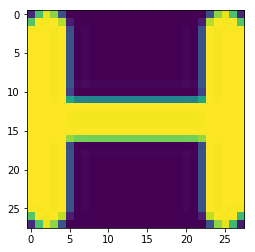

A 0.324


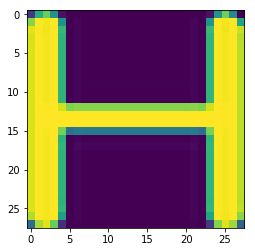

A 0.450


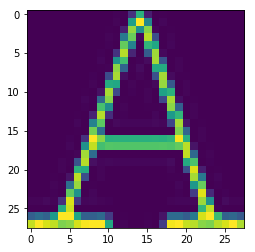

A 0.452


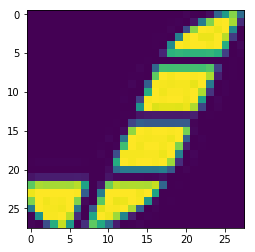

A 0.500


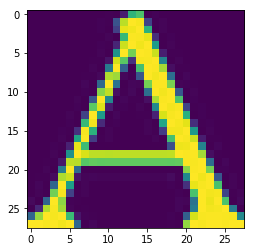

A 0.501


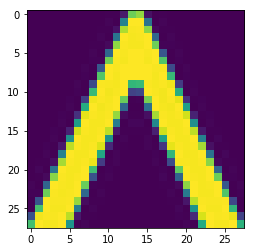

A 0.500


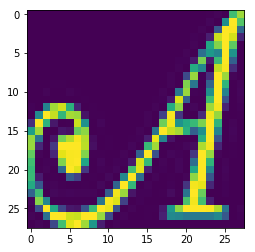

A 0.499


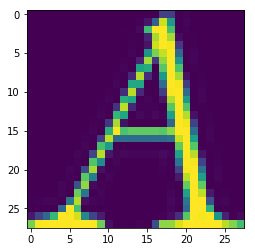

A 0.500


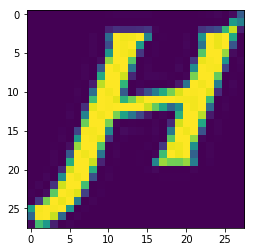

A 0.497


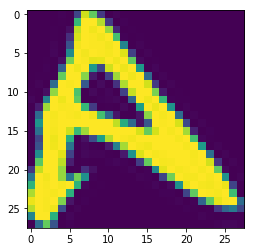

A 0.500


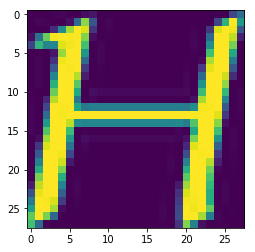

A 0.499


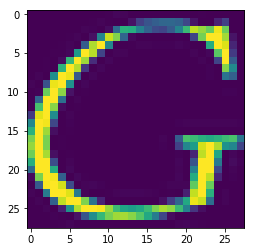

A 0.500


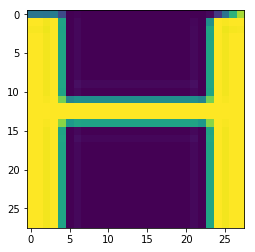

A 0.582


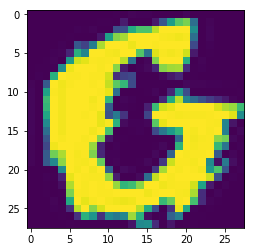

A 0.581


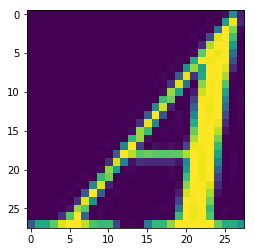

A 0.585


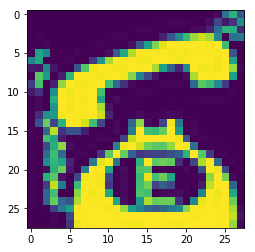

A 0.581


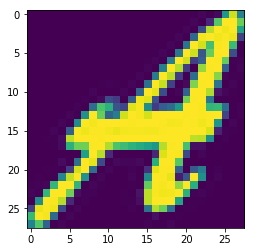

A 0.585


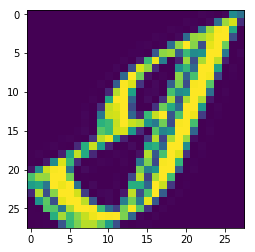

A 0.584


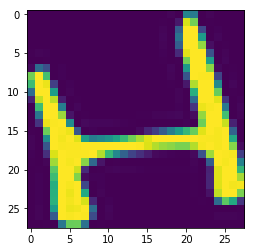

A 0.583


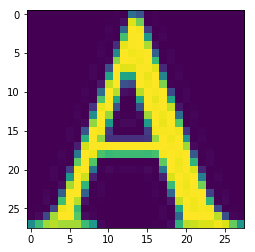

A 0.493


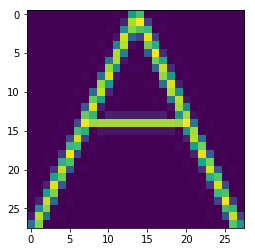

A 0.461


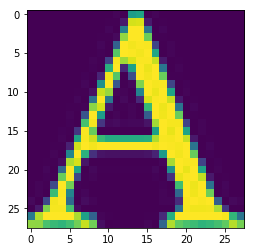

A 0.450


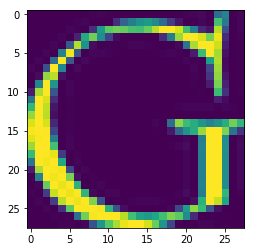

C 0.375


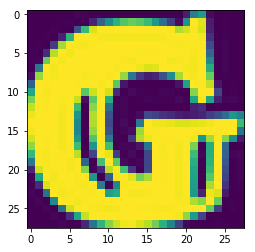

C 0.286


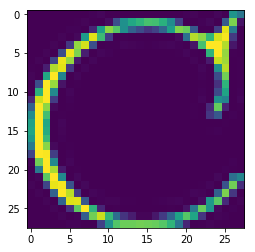

C 0.667


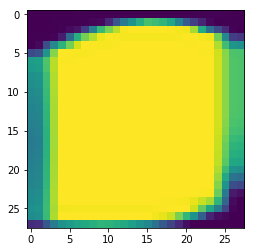

In [169]:
print('Actual point, with label %s' % y)
viz_pt(x)

seq = tree.get_node_seq(x)
for n in seq:
    cnts = n.label_cnts
    hi_label = max(list(INT2LABEL), key=lambda k: cnts[k])
    hi_bias = cnts[hi_label] / sum(cnts.values())
    print('%s %.3f' % (hi_label, hi_bias))
    viz_pt(n.split_point)